In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
pip install yfinance

     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     -------------------------------------- 949.2/949.2 kB 8.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 10.8 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.2-py3-none-any.whl size=139153 sha256=b0ae614ffdef2777e91d6c546ed1b9847daf17d8ede6fc561c43520f9140f291
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\1c\48\cc\00b7d0e7defa21a58915654917c89eaedd32a6e614d8e4ad92
Successfully built peewee

   ---------------------------------------- 0/5 [peewee]
   ----

In [5]:
import yfinance as yf           # For fetching stock data
import pandas as pd             # For working with dataframes
import numpy as np              # For numerical operations
from sklearn.linear_model import LinearRegression  # ML model
from sklearn.model_selection import train_test_split  # Splitting data
import matplotlib.pyplot as plt # Plotting graphs
from datetime import datetime, timedelta  # Handling date ranges

# Set a style for our plots
plt.style.use('seaborn-v0_8-whitegrid')

In [13]:
# Define your portfolio: Tickers and number of shares
# Example: portfolio = {'AAPL': 10, 'GOOGL': 5, 'MSFT': 8}
portfolio = {
    'TSLA': 10,
    'NVDA': 15,
    'INTC':10,
    'BTC-USD': 0.5,
    'ETH-USD': 10
}

print("Your portfolio is:")
for ticker, shares in portfolio.items():
    print(f"- {ticker}: {shares} shares")

Your portfolio is:
- TSLA: 10 shares
- NVDA: 15 shares
- INTC: 10 shares
- BTC-USD: 0.5 shares
- ETH-USD: 10 shares


In [14]:
# Get the list of tickers from our portfolio
tickers = list(portfolio.keys())

# Set the start and end dates for the data we want
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

# Download the closing prices for the tickers
print("Fetching stock data...")
try:
    data = yf.download(tickers, start=start_date, end=end_date)['Close']
    
    # If only one ticker, yf.download returns a Series, so we convert it to a DataFrame
    if len(tickers) == 1:
        data = data.to_frame(name=tickers[0])
        
    print("Data fetched successfully!")
    print("\nHere's a preview of the data:")
    print(data.head())
except Exception as e:
    print(f"An error occurred: {e}")

C:\Users\User\AppData\Local\Temp\ipykernel_14376\1466613280.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)['Close']
[**********************60%****                   ]  3 of 5 completed

Fetching stock data...


[*********************100%***********************]  5 of 5 completed

Data fetched successfully!

Here's a preview of the data:
Ticker           BTC-USD      ETH-USD       INTC        NVDA        TSLA
Date                                                                    
2024-07-12  57899.464844  3134.158691  34.272591  129.199203  248.229996
2024-07-13  59231.953125  3177.198730        NaN         NaN         NaN
2024-07-14  60787.792969  3244.079102        NaN         NaN         NaN
2024-07-15  64870.152344  3489.552734  34.242775  128.399445  252.639999
2024-07-16  65097.148438  3443.513428  34.123535  126.320091  256.559998


In [8]:
print(datetime.now())

2025-07-12 14:24:29.552692


In [15]:
print("--- Portfolio Analysis ---")

# Get the last available price for each stock
last_prices = data.iloc[-1]
current_value = 0

print(f"\n{'Ticker':<10}{'Shares':<10}{'Last Price':<15}{'Current Value':<15}")
print("-" * 50)

for ticker, shares in portfolio.items():
    if ticker in last_prices:
        last_price = last_prices[ticker]
        value = shares * last_price
        current_value += value
        print(f"{ticker:<10}{shares:<10.2f}${last_price:<14.2f}${value:<14.2f}")
    else:
        print(f"{ticker:<10} - Data not available -")

print("-" * 50)
print(f"Total Portfolio Value: ${current_value:,.2f}")

# Calculate the historical value of the portfolio
portfolio_history = pd.DataFrame(index=data.index)
# Multiply the historical prices by the number of shares for each stock and sum them up
portfolio_history['Total Value'] = (data * pd.Series(portfolio)).sum(axis=1)

--- Portfolio Analysis ---

Ticker    Shares    Last Price     Current Value  
--------------------------------------------------
TSLA      10.00     $nan           $nan           
NVDA      15.00     $nan           $nan           
INTC      10.00     $nan           $nan           
BTC-USD   0.50      $117866.69     $58933.34      
ETH-USD   10.00     $2954.93       $29549.35      
--------------------------------------------------
Total Portfolio Value: $nan


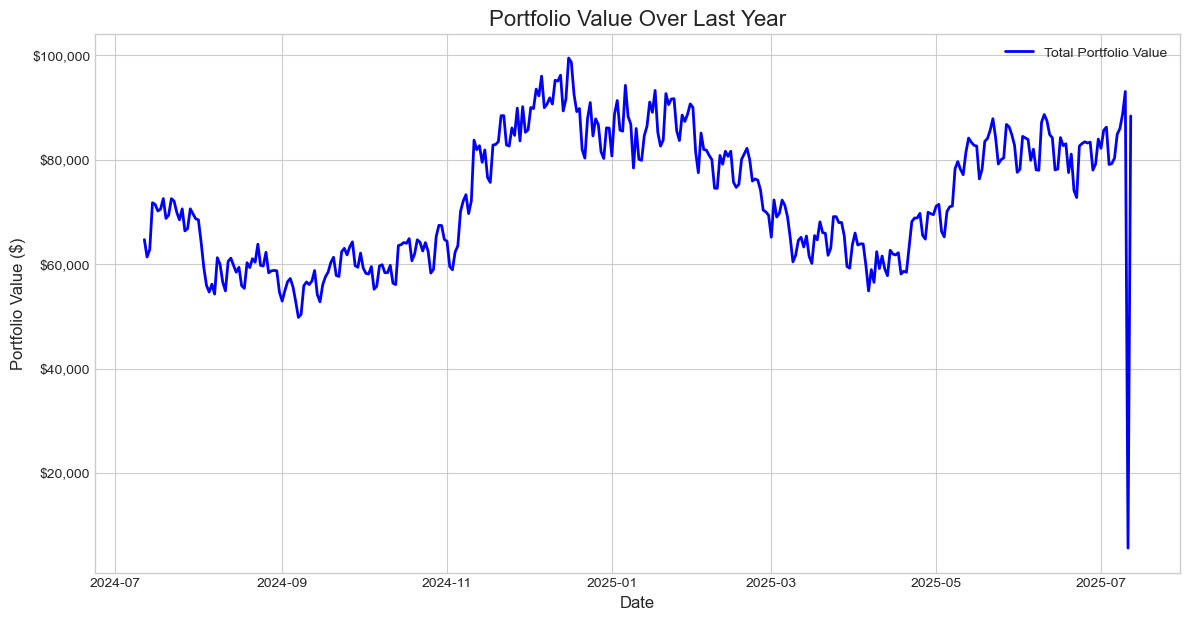

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(portfolio_history.index, portfolio_history['Total Value'], label='Total Portfolio Value', color='blue', linewidth=2)
plt.title('Portfolio Value Over Last Year', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Portfolio Value ($)', fontsize=12)
plt.legend()
plt.grid(True)
# Format the y-axis to show currency
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda y, _: f'${y:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

In [16]:
def train_and_predict(stock_data):
    """
    Trains a simple linear regression model and predicts the next day's price.
    """
    if stock_data is None or stock_data.empty or stock_data.isnull().all():
        return None

    df = stock_data.to_frame()
    # Our feature 'X' will be the current day's price, and our target 'y' will be the next day's price
    df['Prediction'] = df.iloc[:, 0].shift(-1)
    df.dropna(inplace=True)

    X = np.array(df.drop(['Prediction'], axis=1))
    y = np.array(df['Prediction'])

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict the next day's price using the last known price
    last_price = np.array(stock_data.iloc[-1]).reshape(-1, 1)
    prediction = model.predict(last_price)

    return prediction[0]


--- Machine Learning Predictions (Next Trading Day) ---
Predicted next closing price for TSLA: $312.87
Predicted next closing price for NVDA: $163.67
Predicted next closing price for INTC: $23.30
Predicted next closing price for BTC-USD: $117790.40
Predicted next closing price for ETH-USD: $2949.05


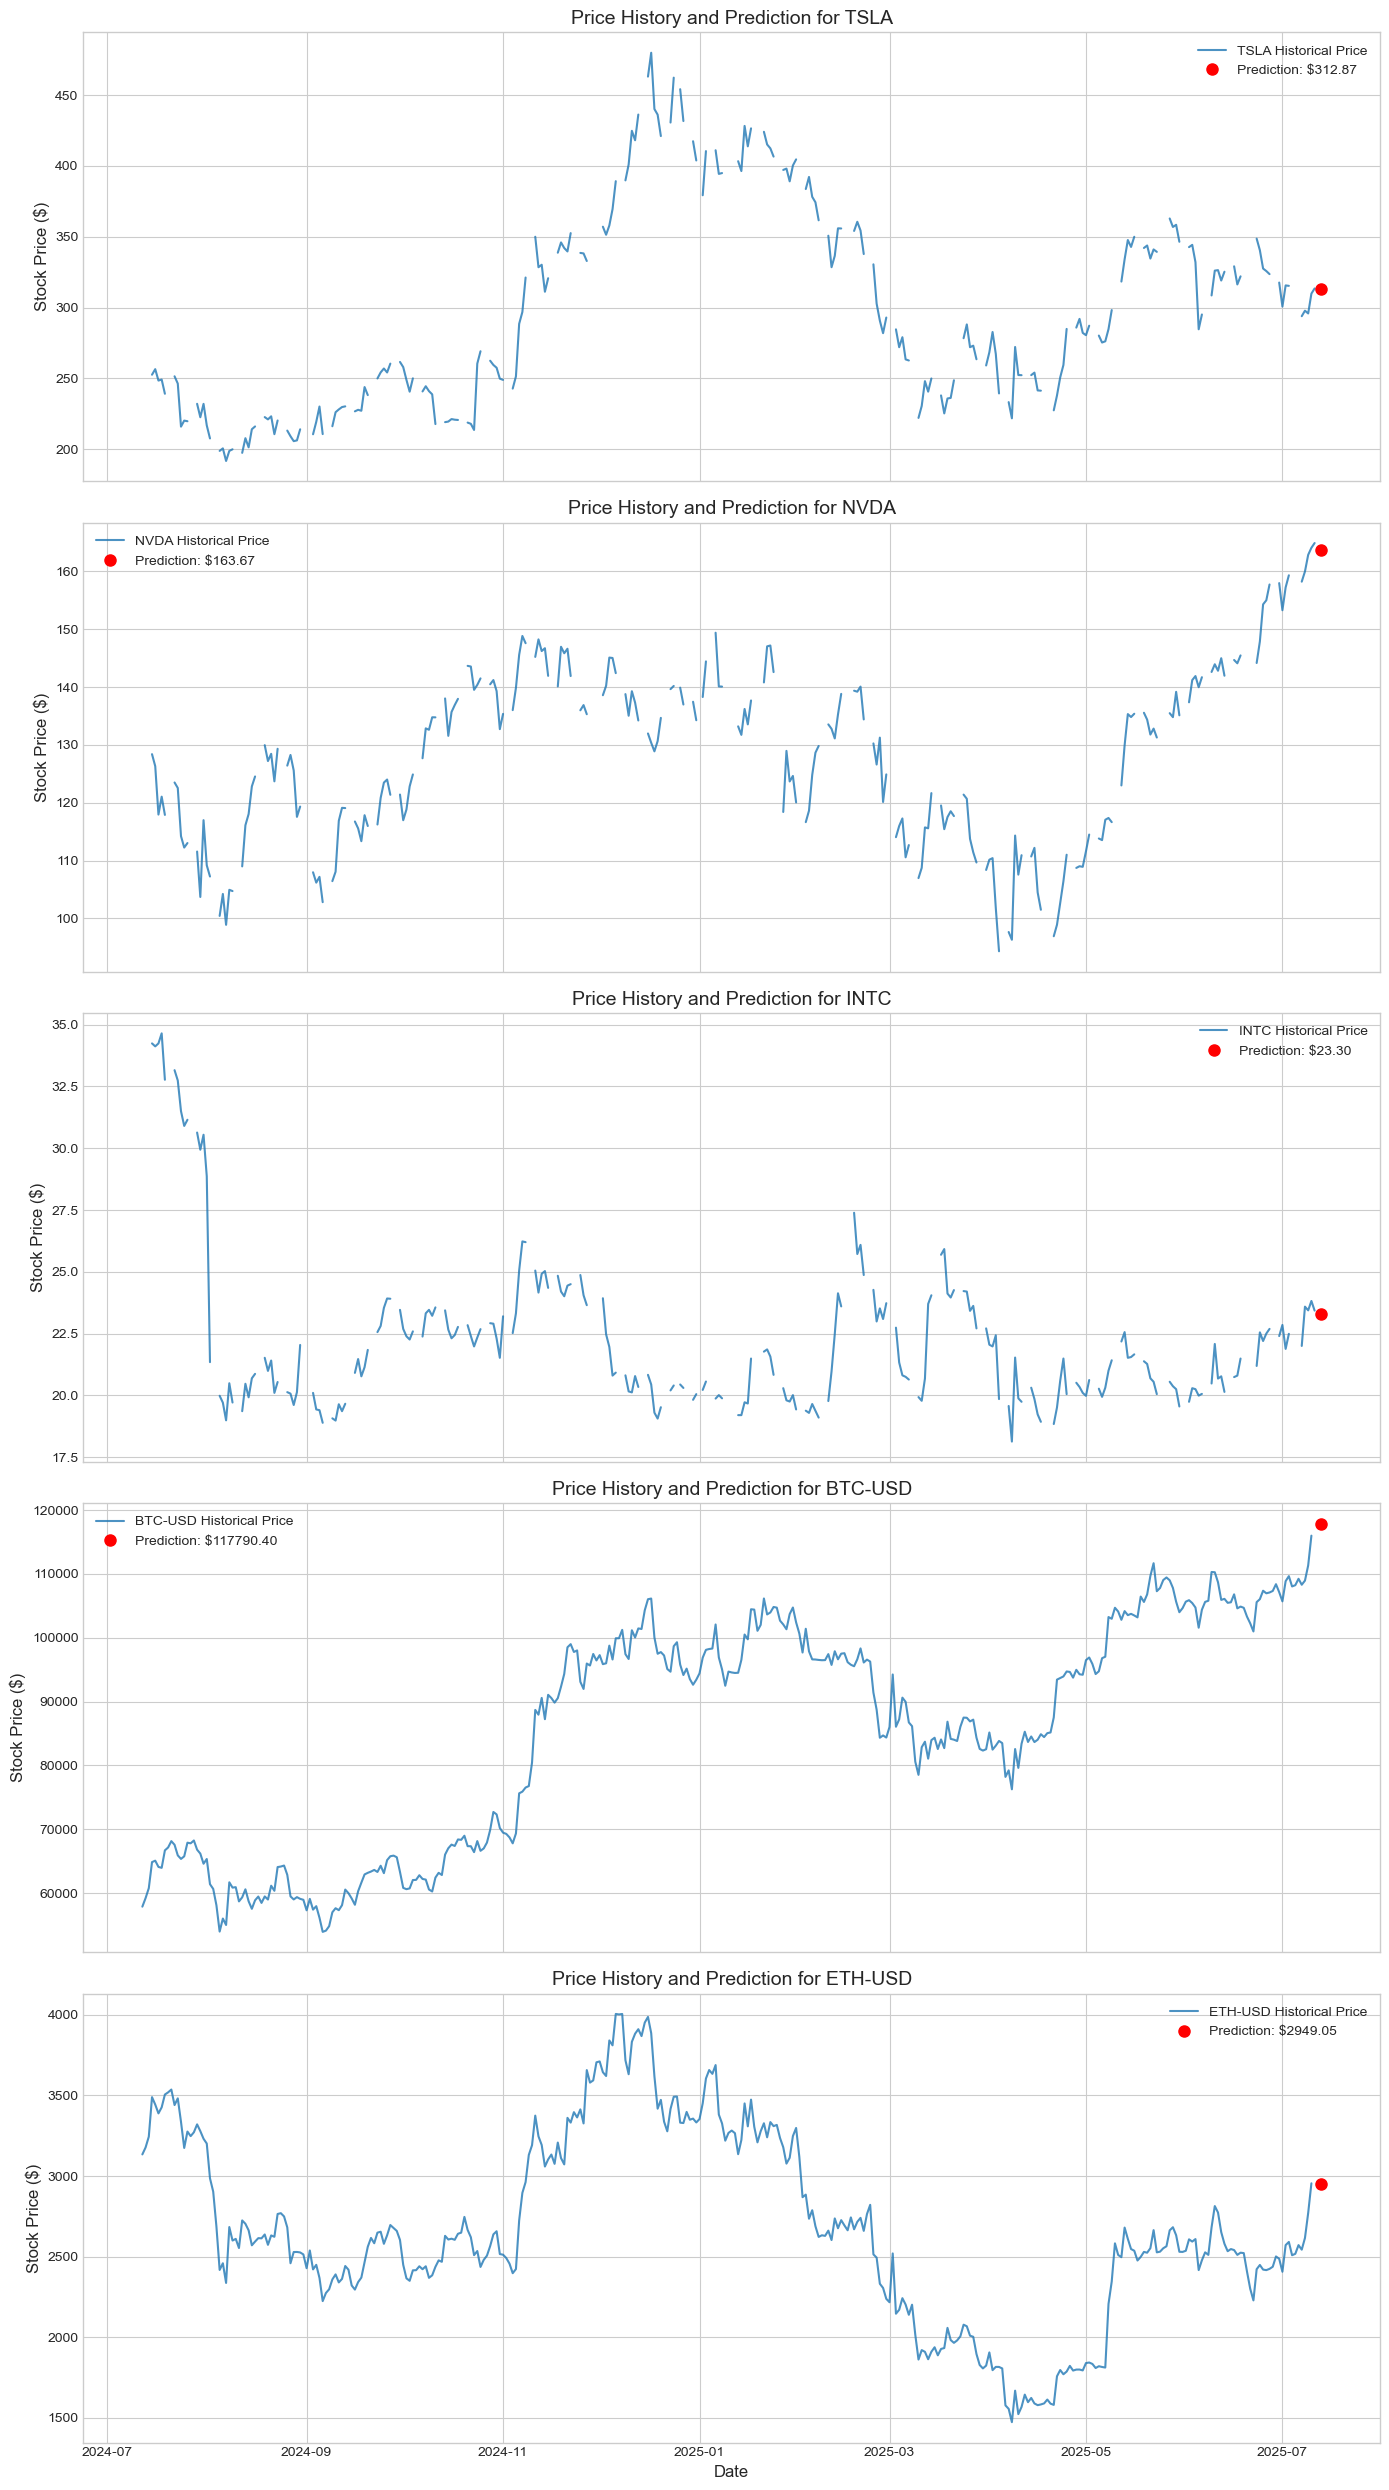

In [17]:
predictions = {}
print("\n--- Machine Learning Predictions (Next Trading Day) ---")

for ticker in tickers:
    # Ensure the data for the ticker is a Series and has no missing values
    stock_series = data[ticker].dropna()
    
    predicted_price = train_and_predict(stock_series)
    if predicted_price:
        predictions[ticker] = predicted_price
        print(f"Predicted next closing price for {ticker}: ${predicted_price:.2f}")

# Visualize the historical prices and the predictions
num_tickers = len(tickers)
fig, axes = plt.subplots(num_tickers, 1, figsize=(14, 5 * num_tickers), sharex=True)

# Ensure 'axes' is always a list, even with one ticker
if num_tickers == 1:
    axes = [axes]

for i, ticker in enumerate(tickers):
    ax = axes[i]
    stock_series = data[ticker]
    
    # Plot historical data
    ax.plot(stock_series.index, stock_series, label=f'{ticker} Historical Price', alpha=0.8)
    
    # Plot the prediction
    if ticker in predictions:
        last_date = stock_series.index[-1]
        next_day = last_date + timedelta(days=1)
        ax.plot(next_day, predictions[ticker], 'ro', markersize=8, label=f'Prediction: ${predictions[ticker]:.2f}')
    
    ax.set_title(f'Price History and Prediction for {ticker}', fontsize=14)
    ax.set_ylabel('Stock Price ($)', fontsize=12)
    ax.legend()
    ax.grid(True)

plt.xlabel('Date', fontsize=12)
plt.tight_layout()
plt.show()